<a href="https://www.kaggle.com/code/ashadullah/mnist-beginner-frndly-simple-ann-at-98-acc?scriptVersionId=166511472" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Here we're installing our dependices required for our model**

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten, Dropout

2024-03-11 17:32:55.381534: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 17:32:55.381632: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-11 17:32:55.512122: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Because its a very famous data so we directly fetch from keras library**

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# **Here we're doing preprocessing**
**Because very important to get over-view and understand of our dataset**

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**Here we're check what is at index[12] you can change and check for more understanding**

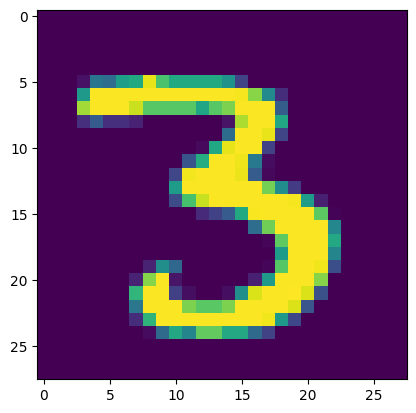

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[12])

**Here we normalizing the our input for better accuracy and quick convergence to the solution and speed up training speed bringing to range betweeen "0-1"**

In [7]:
X_train = X_train/255
X_test = X_test/255

**you can check the output for our previous normalazation**

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# **Here is our model**

which consist of 5 hidden nodes and 1 and 1 input/output respectivly
in first layer we our NN we providing 28,28 because is size our input.
For dropout means we discounting .2 or 20% of our nodes each epochs randomly because of its prevent ours 
model from overfittings and proving better accuracy.
and at output we using softmax because it is a multiclass classification problem.

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dropout(0.2)) 
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(10,activation='softmax'))

**Here is our summary you can check more info. about our model like trainable parameters etc..**

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                3

In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=50,validation_split=0.2, verbose=0)

In [13]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 999us/step


In [14]:
y_pred = y_prob.argmax(axis=1)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9799

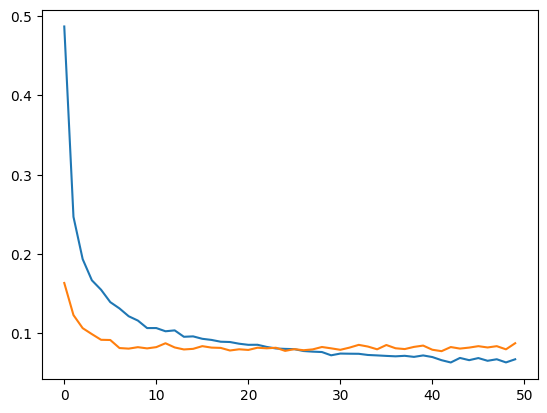

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

**As you can see there very less gap between these two lines which indicates that our model is not overfitings**

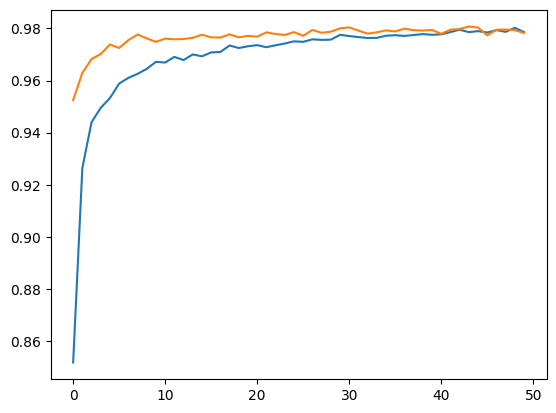

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

**For verfication of model's accuracy we can check our model's predictions**

for example lets take 18th indexed image which as below is "3" we will verifying our model's prediction next step... 

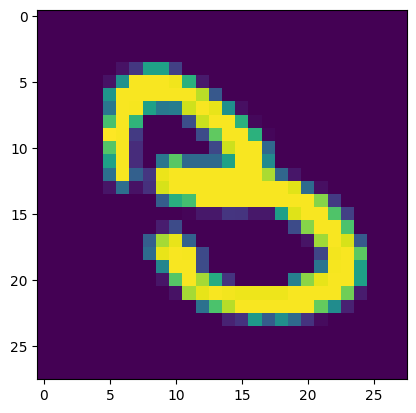

In [18]:
plt.imshow(X_test[18])

**Result**

As you can see our model giving us "array([3])" i.e 3 

you verify from your end just change the index and play with model.
doing more hypertunning further better accuracy..

if finding this easy to understand or any query just ask in comment section. upvote this note for more notebook like this in future....

In [19]:
model.predict(X_test[18].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 15ms/step


array([3])